In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

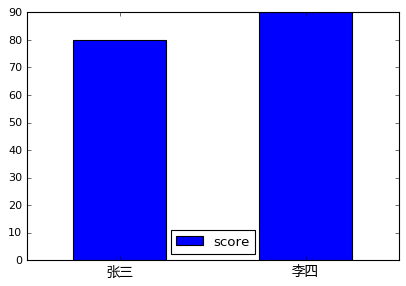

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定
#font = FontProperties(fname="/home/gezi/soft/simsunttc/simsun.ttc", size=12)  #size可不用指定

# linux 的中文字体 /usr/share/fonts/simhei/simhei.ttf

df = DataFrame({"score":[80, 90]}, index=["张三","李四"]) 
ax = df.plot(kind = 'bar', rot = 0) 
labels = [label.decode("utf-8") for label in df.index.values] 
ax.set_xticklabels(labels, fontproperties=font) 
plt.show()

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/bow/vocab.txt', 'vocabulary file')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.full/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn.nodropout/', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'full', '')
flags.DEFINE_bool('feed_single_', False, '')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, max_words=100)
  #print('text_ids', text_ids)
  
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True, max_words=100)
    score = predictor.inference(['textsim'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids],
                                      'bow/main/text2:0': [text2_ids]
                                      })
    print(score[0][0])
    return score[0][0]

  #print('words', words)
  argmax_encode = predictor.inference(['words_importance'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids]
                                      })
  #print('argmax_encode', argmax_encode[0])

  argmax_encode = argmax_encode[0][0]
  argmax_encode = [max(x, 0) for x in argmax_encode]

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, append_start=False, append_end=False)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  #for word, score in zip(words, y):
  #  print(word, score)
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.full/model.ckpt-22.0-28000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.full/model.ckpt-22.0-28000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.full/model.ckpt-22.0-28000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.full/model.ckpt-22.0-28000


In [7]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

铁:0.709749 高铁:0.542154 姚老太:0.365326 高:0.364645 水果节:0.362443 拜拜:0.355415 苦读:0.352819 窗口:0.347289 美丽校花:0.342228 我相信:0.342219 乍暖还寒:0.335307 原来这才是女神:0.335081 京铁:0.333124 挚:0.328626 南阳:0.324519 无悔:0.324343 还省:0.321911 没门路:0.321548 挚爱:0.320852 精英团队:0.317865 简单粗暴:0.317341 吹牛:0.316986 不只是:0.316691 自愧不如:0.315408 小花:0.313916 说拜拜:0.312822 老太:0.312611 店面装修:0.312499 这估:0.311566 《传奇世界手游》:0.309820 126元:0.309260 锁螺丝机:0.308856 99减80:0.308725 此衣:0.308002 友:0.307338 8元:0.305515 西蔓色彩:0.304916 对不起:0.303401 欺:0.302685 奶茶店:0.300827 巴渝职校:0.300483 两江:0.300383 烤鱼店:0.298440 绣艺:0.295951 姚老太烧饼:0.295931 看一天:0.295377 掌心:0.293684 余额:0.293383 海口:0.293220 网订:0.293018 宝鸡:0.291762 儿女:0.291480 姚:0.291139 志腾:0.290069 三零脲碱:0.289209 情商:0.288500 护栏:0.288412 k:0.287880 一降到底:0.286901 亳州:0.286431 8千:0.285961 三国题材:0.285680 吉川:0.285533 万福:0.284815 透支:0.283881 真心:0.283475 内附:0.283251 家有儿女:0.282795 减肥法:0.282446 任务:0.282438 独播:0.281972 全额:0.281576 手工杯:0.281317 赚零花钱:0.281192 本地:0.281090 匠心独运:0.281075 零花钱:0.280566 带上你:0.280214 工艺师:0.27

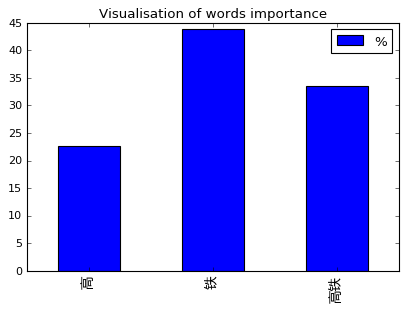

镜:0.891547 墨:0.552497 墨镜:0.511722 新季:0.490099 眼镜:0.487898 太阳镜:0.480798 偏光:0.446861 木纹:0.439188 古风世家:0.434592 建网站:0.420670 分度:0.408267 佳能:0.406159 越来越热:0.405611 钉子:0.403179 网盘:0.403059 6件套:0.400252 配眼镜:0.395786 米诺:0.395623 太帅:0.392845 随身:0.392777 色调:0.387079 来看看你:0.384350 新纪元:0.380666 肌:0.380060 3.14:0.379079 课堂:0.377923 团聚:0.374374 兴益:0.373001 碰瓷:0.372244 重演:0.372135 偏:0.370716 意大利:0.368008 宫寓:0.367182 vr:0.363227 手环:0.362932 维修部:0.361244 名片:0.359576 古风:0.357501 达州:0.356594 佳亲:0.354999 兴起:0.354944 远投:0.354874 徒:0.353418 秩:0.351798 镜架:0.351669 球墨:0.351044 baby:0.350916 妙手:0.350105 锚:0.349765 外星:0.349495 狄:0.349166 小小机器:0.348262 金盛:0.348218 公认:0.347966 寸:0.347387 难求:0.346889 洁尘:0.345913 终身保养:0.345699 徕:0.345464 珂:0.345350 稀世:0.344076 精诚:0.343623 戴:0.343417 手机党:0.343003 封顶:0.341858 牛一:0.341231 徕卡:0.340595 街拍:0.339995 球墨铸铁:0.338564 珂兰钻石:0.338464 像:0.337533 商大:0.336977 随便玩玩:0.336824 养殖基地:0.336623 完虐:0.336615 还原完美的你:0.336210 魁北克:0.336150 翅膀:0.336021 此物:0.335733 泵业:0.335371 华为:0.334976 前沿:0.3

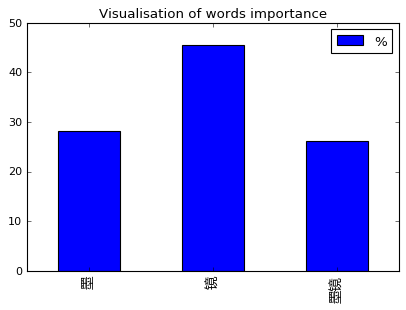

女:0.639807 美女:0.617125 拍照软件:0.435821 美:0.426798 钢管舞:0.409049 一起秀:0.406085 层次:0.402633 姑娘:0.398960 南京奥体:0.393608 尽然:0.391895 视频认证:0.390061 有车有房:0.387393 首月:0.386466 干枯:0.380886 不介意:0.378750 中央电大:0.376939 美发:0.375890 年后再战:0.366609 找男友:0.366215 永久:0.365170 介意:0.364768 黑头:0.356353 招财:0.356254 窄:0.355653 大时代:0.354503 卡牛:0.352285 瘫:0.351629 交友:0.351310 睫:0.351016 约会:0.349777 飞机上:0.349237 她们:0.348769 逗逗:0.348210 减肥产品:0.346918 色斑:0.344118 伦比:0.343831 我的洪荒:0.343047 18888:0.343002 口腔:0.342823 大脑:0.341838 富利:0.341790 呆若木鸡:0.341432 全面升级:0.340881 58元:0.340785 砍死:0.340295 600分:0.340107 所爱:0.339031 祛红血丝:0.337351 真诚交友:0.337021 妹:0.336933 唱歌:0.335164 老公出轨:0.334809 性格开朗:0.334362 茜:0.333877 直播:0.333759 鹿晗:0.333748 刻:0.333734 团战:0.333062 我们又一起:0.332521 丰胸秘籍:0.332433 江湖:0.332055 晗:0.327827 说话技巧:0.327717 月息才:0.327563 我只想:0.327090 钢托:0.326755 龙泰杰:0.324407 泰国佛牌:0.324361 还省:0.324009 性格:0.323250 超微:0.323233 真难:0.323122 选欧:0.323033 场景:0.322967 八百呼:0.322408 能说:0.322310 9个:0.322069 黑暗游戏:0.321908 酵母:0.321184 公会争霸赛:

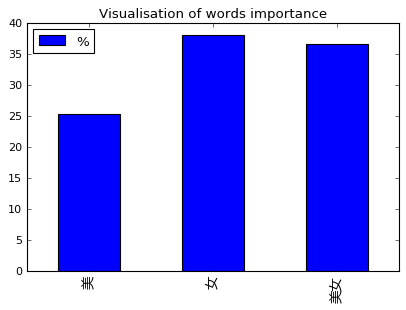

In [8]:
top_words('高铁')
top_words('墨镜')
top_words('美女')

In [9]:
predict('美女', '美女')
predict('帅哥戴墨镜', '帅哥')
predict('帅哥戴墨镜', '墨镜')

[ 1.]
[ 0.5636313]
[ 0.76890016]


array([ 0.76890016], dtype=float32)

[69, 278, 1255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.4267979, 0.63980722, 0.6171248] 1.68373 3
美女


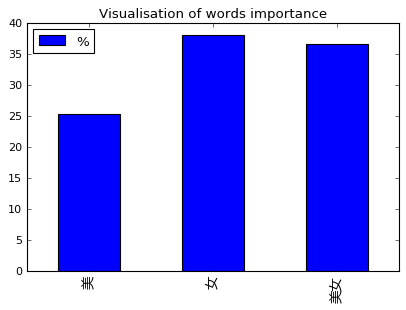

[1112, 1409, 1952, 3235, 1043, 8618, 6, 18800, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.47293562, 0.2609961, 0.58143717, 0.4924584, 0.67720211, 0.36695504, 0.024923526, 0.38582274] 3.26273 8
帅哥戴墨镜


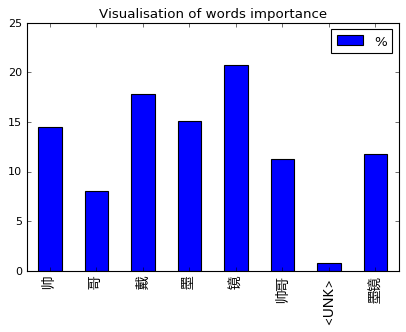

[1439, 68, 492, 92, 7, 48, 35, 230, 31, 576, 40, 24, 21, 22, 9, 20, 313, 125, 4439, 624, 63, 44571, 4, 3694, 2276, 1344, 1258, 222, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.25046432, 0.052209735, 0.53308618, 0.14446762, 0, 0.093993679, 0.077982083, 0.19853063, 0.1352171, 0.38807315, 0.22186169, 0.11477295, 0.029364869, 0.186113, 0.15873733, 0.13730711, 0.13136122, 0.16394781, 0.029739041, 0.50240993, 0.078966349, 0.29220992, 0.13157554, 0.10961106, 0.27818102, 0.1833511, 0.17858809, 0.21479619] 5.01691870764 28
初中孩子的免费精品课，用手机，在家上，省心


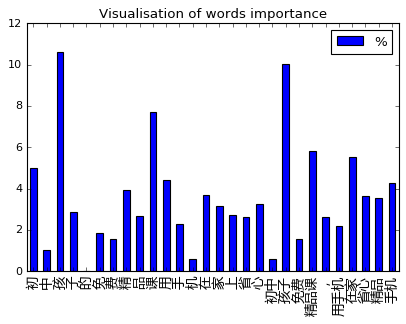

[33, 40, 1927, 327, 43, 301, 71, 978, 120, 13, 547, 24, 21, 166, 22, 73, 301, 184, 156, 1606, 10011, 4, 895, 222, 639, 1293, 4352, 4915, 12345, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.054379873, 0.12481349, 0.31689835, 0.063744672, 0.1448663, 0.14070418, 0.0033993628, 0.17896913, 0.092807494, 0.035706453, 0.12963548, 0.20816545, 0.11783244, 0.018135037, 0.068454877, 0.29610455, 0.14070418, 0.23193634, 0.14650215, 0.084946632, 0.26587287, 0.064433888, 0.068026975, 0.21431708, 0.073171571, 0.071609803, 0.11419135, 0.30923247, 0.27010825] 4.04967 29
好用颜值高才是王道，这些手机现在买才实惠


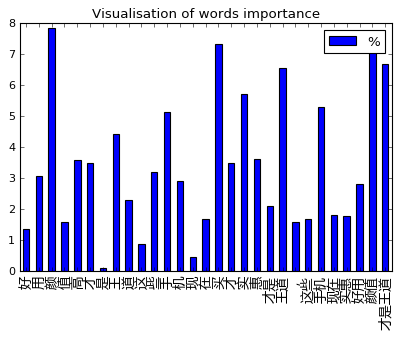

In [10]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

[351, 72, 40, 202, 145, 442, 226, 704, 604, 32, 291, 706, 216, 42, 60, 296, 256, 62, 159, 53, 453, 1595, 2962, 5, 1799, 802, 341, 21148, 416, 294, 1332, 1145, 3, 41, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.082007617, 0.19195077, 0.085124768, 0.36569661, 0.044179596, 0.13121656, 0.17632744, 0.17554781, 0.22475657, 0.2122497, 0.044218477, 0.27211452, 0.1814736, 0, 0.023530524, 0.31616104, 0.074513517, 0.10269291, 0.35820419, 0.17919865, 0.18906976, 0.17442167, 0.2680667, 0.19247669, 0.40806288, 0.27987963, 0.18643349, 0.069593005, 0.45476997, 0.36613777, 0.24473011, 0.39598867, 0.16357593, 0.067455634] 6.70182676613 34
比信用卡分期更划算！有身份证就能申请10-30万贷款


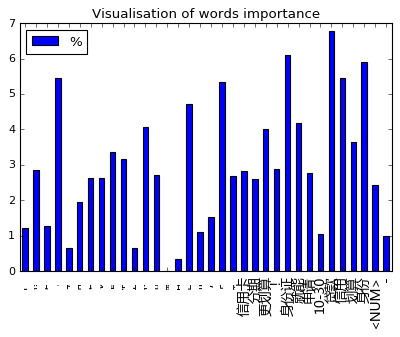

[30, 3164, 1843, 1038, 1418, 121, 264, 128, 71, 302, 14, 85, 11, 179, 22, 13, 139, 73, 6, 6001, 28547, 114, 3133, 8, 6, 16, 6, 16646, 3, 2412, 286, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.10917273, 0.29609889, 0.10667381, 0.31426144, 0.12129574, 0.18465725, 0.14816549, 0.081355631, 0.11781037, 0.15500495, 0.033756554, 0.18480352, 0.033452392, 0.18031731, 0.21285433, 0.073030874, 0.13205031, 0.036034815, 0.035994321, 0.34479833, 0.27869952, 0.020721953, 0.1928056, 0, 0.035994321, 0.058957767, 0.035994321, 0.34848362, 0.25858968, 0.21529126, 0.18980116] 4.53692824394 31
1890元往返飞旧金山?真是赚了,我一直在这里买!


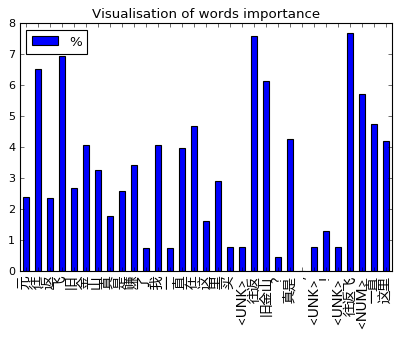

[13, 301, 71, 20, 370, 886, 78, 141, 323, 7, 165, 2339, 167, 39, 152, 220, 1606, 1196, 790, 4103, 5161, 2313, 5, 8664, 890, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.28578353, 0.1547716, 0.092905968, 0.062386543, 0.16436195, 0.23966536, 0.029083768, 0.20137727, 0.33972037, 0.084711984, 0.20551752, 0.16286233, 0.071673505, 0.046221316, 0.14538153, 0.15525386, 0.1267705, 0.43778154, 0.45305666, 0.24396287, 0.14076164, 0.30751544, 0.17609534, 0.095619537, 0.22754233] 4.65078 25
这才是上班族修本科的正确打开方式！


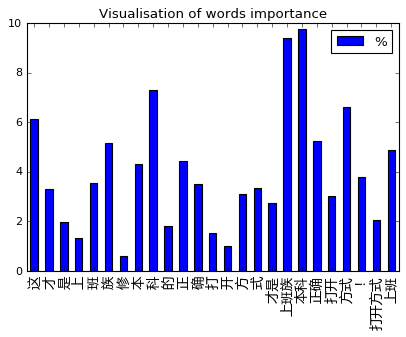

In [11]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

[45, 519, 54, 93, 52, 12, 83, 730, 315, 58, 398, 13, 547, 452, 2679, 454, 18, 205, 1340, 240, 162, 338, 436, 37863, 688, 2173, 810, 8, 895, 6947, 13590, 6, 18938, 7699, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.18425597, 0.15403053, 0.060400054, 0.16033027, 0.093712091, 0.069562748, 0.067800507, 0.34651172, 0.15209316, 0.20574468, 0.21261129, 0.14300218, 0.14968082, 0.079942904, 0.29547608, 0.085531034, 0.097733878, 0.10828874, 0.20023814, 0.20674792, 0.21701859, 0.2141311, 0.031305406, 0.051655605, 0.11628316, 0.12783167, 0.38544998, 0, 0.074896619, 0.40706509, 0.34560591, 0.039262544, 0.0077865776, 0.2511647] 5.34315166436 34
国庆到成都不要住酒店啦,这些民宿带你领略别样风情


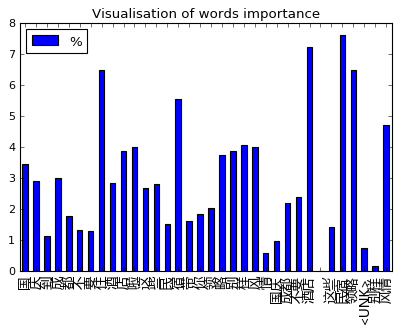

[136, 561, 56, 24, 21, 12, 272, 136, 561, 34, 243, 262, 10900, 222, 114, 1291, 533, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.28525501, 0.40603173, 0.13832773, 0.13904314, 0.067586482, 0.11990792, 0.058232635, 0.28525501, 0.40603173, 0.14222592, 0.33388406, 0.33213785, 0.13644907, 0.33498156, 0.198431, 0.15004763, 0.39269704] 3.92653 17
低头玩手机?不如低头学英语


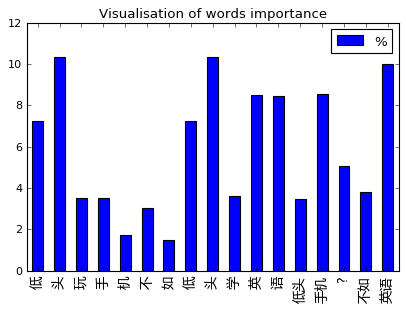

[1112, 1409, 548, 849, 98, 600, 22, 85, 13, 139, 3564, 169, 32, 13, 64, 690, 26, 592, 72, 76, 29, 101, 78, 139, 185, 640, 32, 11, 53, 766, 233, 18, 8618, 5, 19260, 286, 33030, 19090, 188, 4028, 6906, 1203, 6863, 903, 2038, 1234, 3002, 339, 3, 2606]
argmaxs [0.12964682, 0.12456281, 0.11858298, 0.11095735, 0.18194212, 0.44239646, 0.20147568, 0.072981946, 0.059110459, 0.15425886, 0.14481363, 0.0056148954, 0.18136567, 0.059110459, 0.13116904, 0.096888348, 0.12316242, 0.12788434, 0.1396165, 0.0020904192, 0.0069461158, 0.090853259, 0.073216595, 0.15425886, 0.0083564408, 0.039249219, 0.18136567, 0.056358673, 0.1726567, 0.054785255, 0.041129015, 0.17576927, 0.12087072, 0.065444633, 0, 0, 0.19428653, 0.084962621, 0.10854202, 0, 0.022604968, 0.11312491, 0.1150955, 0.17030196, 0.11716466, 0.16617367, 0.30110246, 0.038957085, 0.031434052, 0.24595731] 5.55859938776 50
帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你


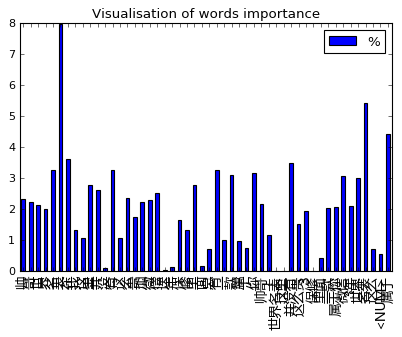

[230, 669, 268, 207, 11, 320, 11, 243, 262, 426, 869, 384, 153, 576, 253, 492, 92, 532, 884, 346, 20, 243, 262, 30, 176, 675, 576, 48, 35, 205, 438, 2607, 1727, 1564, 533, 2682, 29872, 8, 624, 4129, 2840, 16, 5778, 1743, 63, 795, 29386, 7664, 5890, 864]
argmaxs [0.057165589, 0.10490535, 0.28745496, 0.28986454, 0.17749271, 0.19751611, 0.17749271, 0.43525285, 0.49646646, 0.11517009, 0.13994135, 0.018506447, 0.15438068, 0.21914005, 0.050957832, 0.46727699, 0.068260536, 0.11073695, 0.08129999, 0.20554657, 0.10735475, 0.43525285, 0.49646646, 0.097937018, 0.065790474, 0.18133368, 0.21914005, 0.093305029, 0.18211174, 0.11823305, 0.053199254, 0.19460537, 0.52091503, 0.12857817, 0.4834829, 0.10308068, 0.08107201, 0.10657502, 0.40750852, 0, 0.11869989, 0.14350682, 0, 0.19773324, 0.1111916, 0.055505455, 0.026134951, 0.019660391, 0.21619271, 0.066289544] 8.88568542153 50
精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取


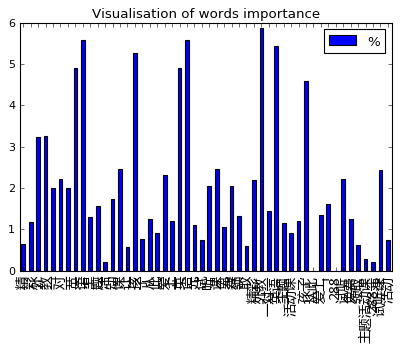

In [12]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

[167, 75, 257, 44, 34, 138, 2086, 34, 755, 232, 385, 155, 171, 782, 54, 239, 52, 12, 1395, 2352, 5676, 114, 2318, 1960, 8, 19499, 2551, 5, 6, 4451, 866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.12824464, 0.044067681, 0.0048448332, 0.18124598, 0.33465236, 0.13815525, 0.060226716, 0.33465236, 0.41157699, 0.4180845, 0.17210373, 0.16442902, 0.022968976, 0.20873386, 0.013833318, 0.13533472, 0, 0.019937795, 0.11375476, 0.35514811, 0, 0.010738481, 0.47118354, 0.21029432, 0.055524841, 0.032926131, 0.10001269, 0.15015608, 0, 0.30164951, 0.085720867] 4.68020206876 31
打工回来学点啥?学厨师当老板,走到哪都不怕！


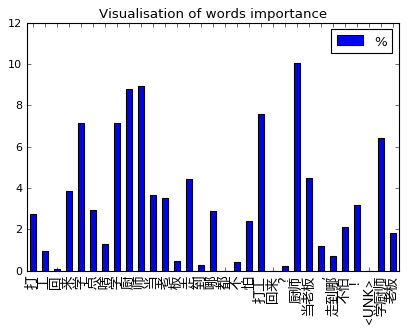

[140, 3492, 26, 49, 135, 194, 755, 232, 640, 646, 744, 448, 129, 15, 4851, 66, 8, 1045, 2318, 1316, 894, 249, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.10648128, 0.41628957, 0.048928358, 0.11597739, 0.053662896, 0.20043346, 0.53744841, 0.21453419, 0.13743478, 0.042810127, 0.010511836, 0.1697216, 0.021594921, 0.075815693, 0.39295372, 0.2502853, 0, 0.32770059, 0.48667526, 0.40286833, 0.12199026, 0.27025434, 0.087202586] 4.49157491326 23
水饺加盟,无需厨师,总部扶持创业!


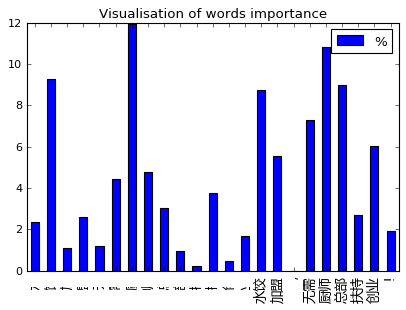

[140, 3492, 26, 49, 135, 194, 755, 232, 640, 646, 744, 448, 129, 15, 4851, 66, 8, 1045, 2318, 1316, 894, 249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.11587763, 0.40588737, 0.065221444, 0.12769529, 0.055169106, 0.19761568, 0.53977513, 0.20053467, 0.14737636, 0.046542943, 0.024357934, 0.18044469, 0.012080884, 0.056829479, 0.38914499, 0.25782254, 0, 0.3274768, 0.48605737, 0.41307867, 0.13026026, 0.30381051] 4.48305973969 22
水饺加盟,无需厨师,总部扶持创业


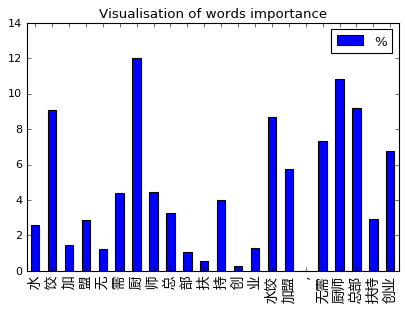

In [13]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

[2081, 1004, 534, 60, 43, 728, 215, 60, 22, 154, 46, 1672, 14, 1369, 4554, 2060, 244, 2845, 607, 5, 10039, 9752, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.3557626, 0.22779877, 0.25639778, 0.17106983, 0, 0.19731525, 0.21300152, 0.17106983, 0.15831327, 0.17304459, 0.066249952, 0.36879545, 0.15773857, 0.36709258, 0.56541634, 0.22398812, 0.30712897, 0.47209144, 0.11204376, 0.16766123, 0.55238336, 0.56202841] 5.8463916257 22
iPhone隐藏功能：高铁也能在线选座了！


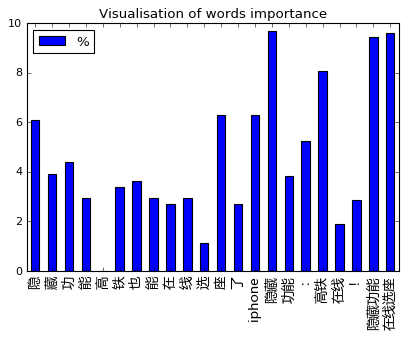

In [14]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.36709255]


array([ 0.36709255], dtype=float32)

In [16]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.32735336]


array([ 0.32735336], dtype=float32)

In [17]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '选座')

[ 0.36532706]


array([ 0.36532706], dtype=float32)

In [18]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.23165864]


array([ 0.23165864], dtype=float32)

[2991, 24, 703, 2952, 695, 266, 664, 405, 7302, 1571, 205, 1340, 7, 217, 513, 253, 125, 1658, 4177, 20, 664, 405, 5201, 6228, 5048, 9848, 13371, 6, 8, 13590, 3352, 3925, 10442, 3346, 6380, 10861, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.063398987, 0.10563885, 0.32346237, 0.30896193, 0.12913395, 0.13532159, 0.47322565, 0.29999173, 0.10808793, 0.070474848, 0.065747179, 0.038150262, 0, 0.098374605, 0.15477119, 0.17506695, 0.10535827, 0.26998389, 0.19892956, 0.081572935, 0.47322565, 0.29999173, 0.3158924, 0.33951598, 0.010558472, 0.238763, 0.025417697, 0.089103192, 0.094317988, 0.24212143, 0.080428846, 0.039992962, 0.25738579, 0.34972638, 0.349121, 0.092578188] 6.50379339326 36
携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀


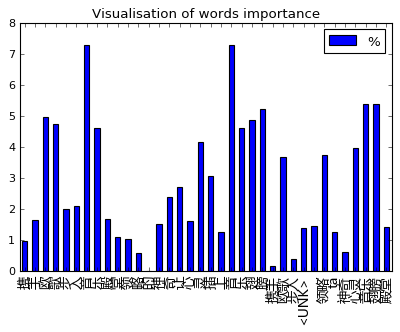

In [19]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

[418, 23, 295, 389, 315, 58, 88, 132, 402, 228, 472, 192, 99, 726, 735, 28, 661, 1091, 200, 7, 373, 1644, 888, 6, 208, 8, 6954, 6, 10, 1328, 6, 79, 5129, 920, 810, 1766, 4584, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.14989074, 0.056503788, 0.067587495, 0.21817094, 0.1426121, 0.17049682, 0.0037129717, 0.17825016, 0.23899913, 0, 0.11912395, 0.040990196, 0.2373406, 0.21921486, 0.065309808, 0.13347228, 0.17136751, 0.10999615, 0.1463117, 0.11013989, 0.10860693, 0.10675134, 0.13644825, 0.012002273, 0.098001935, 0.0779076, 0.38060594, 0.012002273, 0, 0.14546901, 0.012002273, 0.11004865, 0.27595353, 0.25158846, 0.36564779, 0.32135344, 0.3201952] 5.31407598313 37
底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.


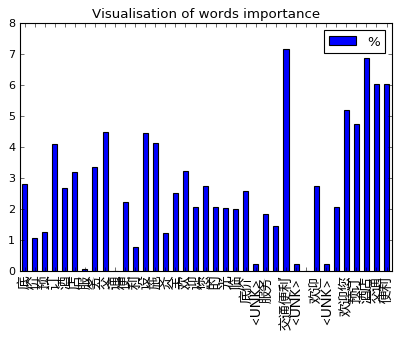

In [20]:
predict('底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.')

[1387, 25, 36, 1901, 651, 602, 310, 315, 58, 130, 131, 11, 320, 11, 36, 1901, 130, 131, 12002, 2397, 5352, 810, 180, 8, 1564, 10746, 3866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.17587402, 0.078227155, 0.42869234, 0.58419967, 0.022603361, 0.13086161, 0.18086794, 0.11270444, 0.21810611, 0.072948456, 0.29608744, 0.11892873, 0.12823837, 0.11892873, 0.42869234, 0.58419967, 0.072948456, 0.29608744, 0.15824044, 0.44679537, 0.28886712, 0.24437739, 0.11820823, 0, 0.10050355, 0.15615848, 0.091952726] 5.6542995777 27
巨人游泳五星级酒店培训,一对一游泳培训


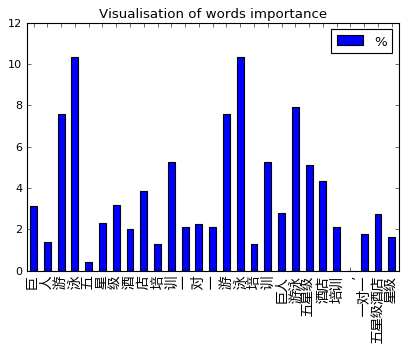

In [21]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

[151, 343, 64, 934, 934, 52, 253, 492, 92, 44, 34, 243, 262, 492, 92, 17, 3389, 39, 267, 325, 192, 311, 243, 262, 149, 83, 50, 1146, 2011, 624, 9528, 533, 27, 4367, 3295, 3021, 4, 830, 596, 5, 4571, 3896, 812, 9454, 3, 0, 0, 0, 0, 0]
argmaxs [0.12614307, 0.055804759, 0.2468828, 0.28776377, 0.28776377, 0.095064439, 0.087983087, 0.48668709, 0.23313206, 0.12022439, 0.11682915, 0.40320361, 0.47427255, 0.48668709, 0.23313206, 0.064161688, 0.31164226, 0.12949832, 0.064389676, 0.24100153, 0.19068611, 0.18304512, 0.40320361, 0.47427255, 0.087945521, 0.11316925, 0.0035905447, 0.16827264, 0.10546887, 0.43921569, 0.35572487, 0.46329033, 0.087563127, 0.41292045, 0.17024784, 0.3245787, 0.0035031033, 0.082537942, 0.21550114, 0.045418568, 0.41602942, 0.11157447, 0.16096249, 0.2954222, 0.026268082] 9.89268 45
为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！


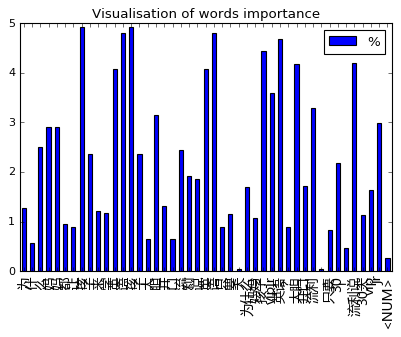

In [22]:
predict('为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！')

[3164, 1843, 1038, 1418, 121, 264, 128, 71, 302, 14, 85, 11, 179, 22, 13, 139, 73, 6001, 28547, 114, 3133, 8, 6, 16, 16646, 2412, 286, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.35516593, 0.12652212, 0.33071864, 0.15663731, 0.20450293, 0.18210992, 0.098229289, 0.15625253, 0.1806464, 0, 0.15352765, 0.023799235, 0.19088714, 0.22007923, 0.09522105, 0.14314139, 0.031431481, 0.39521495, 0.31871465, 0.03984236, 0.19074759, 0, 0, 0.052998208, 0.37095362, 0.27364144, 0.24580602] 4.53679107316 27
往返飞旧金山?真是赚了,我一直在这里买!


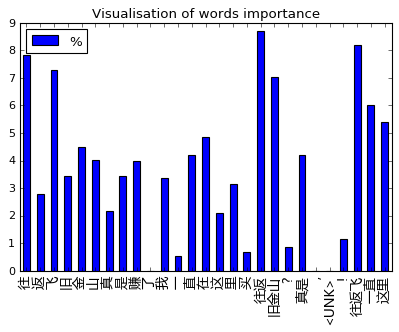

In [23]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

[12, 83, 730, 315, 58, 13, 139, 7, 452, 2679, 33, 2173, 810, 4, 286, 6947, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.070769578, 0.14372164, 0.46425164, 0.29407266, 0.2875033, 0.17773317, 0.075799197, 0.1210403, 0.091276214, 0.35381567, 0.1367473, 0.16371453, 0.34963983, 0.084370434, 0.17851353, 0.47076535] 3.46373 16
不要住酒店，这里的民宿好


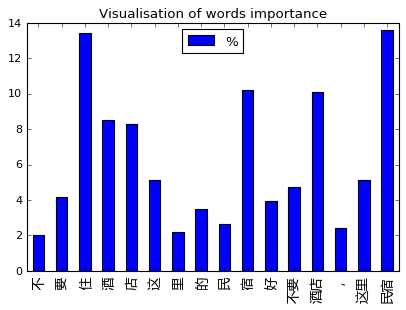

In [24]:
predict('不要住酒店，这里的民宿好')

[12, 83, 730, 452, 2679, 13, 139, 7, 315, 58, 33, 2173, 6947, 4, 286, 810, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.070769578, 0.1437216, 0.46425164, 0.091276214, 0.35381562, 0.17773314, 0.075799197, 0.12104031, 0.29407269, 0.2875033, 0.13674726, 0.1637145, 0.47076535, 0.084370434, 0.1785135, 0.3496398] 3.46373 16
不要住民宿，这里的酒店好


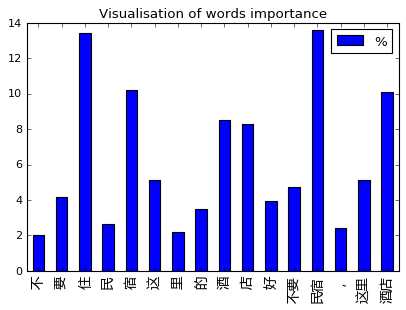

In [25]:
predict('不要住民宿，这里的酒店好')

[242, 217, 39, 38, 37, 40, 3235, 1043, 280, 64, 60, 146, 14, 625, 621, 23, 191, 42, 116, 198, 586, 14, 5723, 3044, 18800, 4, 7160, 970, 7471, 367, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.21920079, 0.19541296, 0.16671419, 0.20933017, 0.15505363, 0.12970854, 0.37002939, 0.54421932, 0.072746448, 0.090147234, 0.18873656, 0.069172353, 0.21561827, 0.2233341, 0.25378728, 0.14717327, 0.11174031, 0.15071158, 0.14700776, 0.14284158, 0.0912854, 0.21561827, 0.3194938, 0.27374762, 0.3312836, 0.044627182, 0.015436433, 0.415764, 0.13737066, 0.080801636] 5.72811 30
男神开车专用墨镜，怎么能少了它，降价后就快抢完了


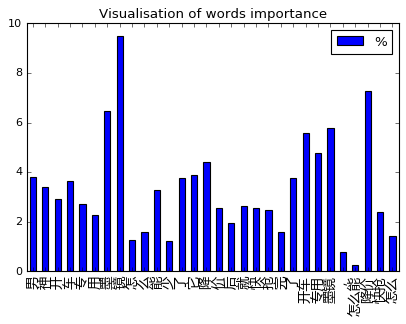

In [26]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

[85, 7, 9, 2743, 156, 74, 1048, 44, 1048, 289, 46, 11, 53, 692, 661, 7, 3235, 1043, 466, 270, 83, 6, 7331, 6251, 114, 27970, 1498, 18800, 2792, 34501, 48715, 4217, 1203, 1827, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.13770178, 0.10387871, 0.20773527, 0.187071, 0.10518212, 0.029391348, 0.2317766, 0.044719838, 0.2317766, 0.24222416, 0.17844567, 0.072434239, 0.29445913, 0.18269396, 0.20006345, 0.10387871, 0.25044408, 0.34664306, 0.2118293, 0.05362884, 0.11939478, 0, 0.13587753, 0.27884662, 0.087933533, 0.10455213, 0.15410924, 0.2571131, 0.1153736, 0.23245353, 0.14469366, 0.27220929, 0.043180808, 0.075737961] 5.43745362014 34
我的家乡惠州越来越热?选一款喜欢的墨镜很重要


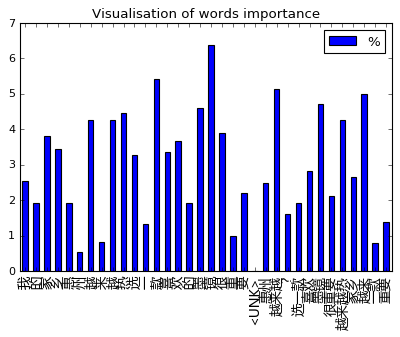

In [27]:
predict('我的家乡惠州越来越热?选一款喜欢的墨镜很重要')

[46, 11, 53, 692, 661, 7, 3235, 1043, 466, 270, 83, 27970, 1498, 18800, 2792, 1203, 1827, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.18963823, 0.2510168, 0.35284591, 0.29591191, 0.29361492, 0.11175752, 0.34608704, 0.43186933, 0.26497161, 0.072004706, 0.17399707, 0.14208782, 0.27608371, 0.29145488, 0.27129167, 0.15147185, 0.26835078] 4.18446 17
选一款喜欢的墨镜很重要


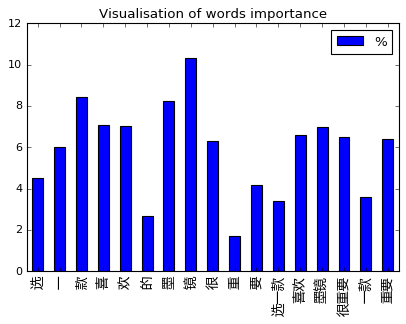

In [28]:
predict('选一款喜欢的墨镜很重要')

In [29]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.67441005]


array([ 0.67441005], dtype=float32)

In [30]:
predict('我的家乡惠州越来越热，选一款喜欢的墨镜很重要', '我的家乡惠州越来越热')

[ 0.56572855]


array([ 0.56572855], dtype=float32)

宿:0.650656 民宿:0.632130 民:0.470155 豪宅:0.425671 缝脏:0.403897 发黄:0.399487 15.8:0.396158 芳香:0.390758 把你宠上天:0.386832 小区:0.386684 特卖会:0.377855 毕竟:0.373448 品牌形象:0.372862 6万3:0.372324 英联邦:0.365218 白工作:0.365170 疯狂点赞:0.364141 居众:0.361893 皇家:0.361262 椰:0.360680 万豪:0.357564 高贵:0.357106 学钢琴:0.355597 8折:0.354453 微致:0.353000 顺泰:0.352340 温馨的家:0.351946 好水漆:0.350386 冰晶:0.350038 一城:0.348600 奈:0.347180 品牌家电:0.346480 我的神魂:0.343509 altea:0.343160 wor:0.342532 三亚:0.341086 清新风:0.340619 椰岛:0.340486 撩粉:0.339544 某个:0.339269 艳遇:0.339053 背包:0.338992 华佑:0.338468 万学员:0.338305 农家院:0.337564 张1折:0.337437 除尘设备:0.336678 配套完善:0.336382 其中:0.336094 普吉岛:0.335692 火爆项目:0.334729 主材:0.334449 美发店:0.334438 军嫂:0.331162 晔:0.331123 没找到:0.328746 小管家:0.328554 数位:0.328008 不误:0.327144 蚊虫:0.326602 会场:0.326063 科飞:0.325516 会议场地:0.324257 为啥住的比你好:0.324253 水电:0.324215 盖帽:0.324004 可行性报告:0.323674 精装:0.323553 不想回家:0.322247 聚会:0.322184 儿童摄影馆:0.321872 旅游攻略:0.321613 跳吧:0.320303 超美:0.320136 第一套房:0.319686 塞纳左岸:0.319454 在这里上班的人都不想回家:0.319090 上海申花:0.3183

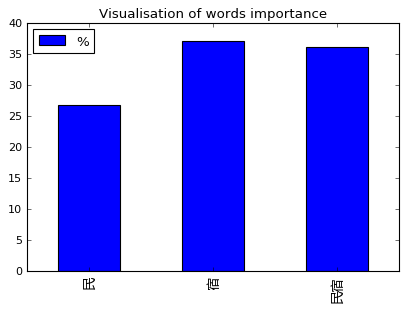

In [31]:
top_words('民宿')

酒店:0.539282 酒:0.431758 宾馆:0.414295 店:0.412146 途家:0.395596 雪依氏:0.372909 冰晶画:0.363433 疯狂点赞:0.362060 冰晶:0.360826 不配:0.355821 室内设计:0.353998 健身会所:0.351934 墙体广告:0.351307 某个:0.350221 旧家具:0.349770 为啥住的比你好:0.348079 你好:0.346423 合建:0.344321 创世:0.343821 控制系统:0.342503 被子:0.342179 三好:0.339950 合建志洋:0.339215 住:0.337324 爱她:0.336473 新娘跟妆:0.335737 效益高:0.334755 件套:0.334671 备婚:0.331103 鼻腔:0.330683 小青:0.330071 万学员:0.329498 科飞:0.327850 交通便利:0.327613 环境优美:0.327587 厅:0.326001 旷世:0.325486 建材店:0.324698 配不配:0.324546 软包:0.323280 豪宅感:0.323052 到期:0.322978 创世代:0.322264 有三好:0.322040 潘朵拉:0.321120 梦想中的家:0.320940 《九阳神功》:0.320740 茶几:0.320189 盈利模式:0.319254 旷:0.317929 微博:0.315799 400元:0.315517 收买:0.315083 美乐乐:0.314548 可行:0.314399 百搭:0.313921 海景房:0.313346 超乎:0.313086 最新款:0.312753 板块:0.311476 书写:0.311367 群发:0.311022 桑拿:0.307999 排兵布阵:0.307772 揽:0.307393 北京邮电大学:0.307173 高温瑜伽:0.306536 桑拿设备:0.306464 家纺品牌:0.306176 altea:0.305770 装饰公司:0.304771 捷众:0.304563 业务遍神州:0.304334 1份:0.303648 灶具:0.303600 墙体:0.303037 包工包料:0.302711 北京北京:0.30239

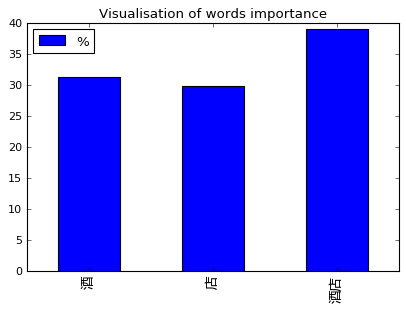

In [32]:
top_words('酒店')

新加坡:0.806695 坡:0.746849 移民:0.471809 niit:0.456244 往返:0.444191 天源:0.442168 银滩:0.439497 张家界:0.434817 专车接送:0.434810 初七:0.427489 绿尚佳:0.422988 投保:0.422408 马来西亚:0.420713 泰康:0.420038 看房:0.417182 精装修:0.416742 养老地产:0.416370 十里银滩:0.415053 俄:0.413970 甲米:0.413783 神景:0.412160 往返飞:0.410023 怀柔:0.409151 办公楼:0.407071 雁:0.406888 眼科医院:0.404649 加:0.404575 景观:0.404050 尚佳:0.403388 观邸:0.400059 天瑞:0.399938 塑料制品:0.399438 春航:0.399335 模型:0.398302 大梅沙:0.397472 栖:0.395962 末世:0.395415 隆鑫:0.393590 落户厦门:0.386561 公馆:0.386460 刚需:0.386304 大上海:0.386272 井冈山:0.385385 美化:0.385342 境外:0.384943 俱佳:0.384728 熙:0.384495 汇海:0.383804 繁华:0.382841 现房:0.382664 500-5000:0.382119 亚东:0.381823 炬:0.380906 邸:0.378868 荃:0.378860 金品时代:0.377106 你不容错过:0.376916 加热器:0.376853 买房子:0.376410 郸:0.376252 考场:0.375810 涿州房产:0.375286 同步辅导:0.374140 技校:0.373959 绿地:0.373492 敦:0.372761 旧金山:0.371973 挑高:0.369223 火炬:0.369042 盐田:0.368241 巢:0.368094 三十天:0.367980 鸿辉:0.367066 优倍:0.366706 绿都:0.365867 永洁:0.365383 创业移民:0.365301 福运:0.364782 北京地铁:0.364439 小产权:0.364384 湖景房

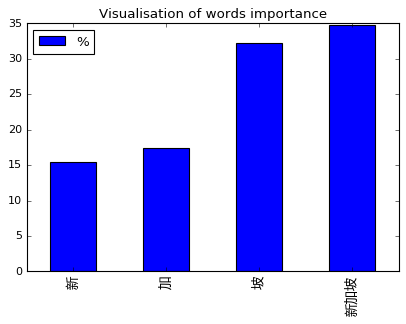

In [33]:
top_words('新加坡')

镜:0.354080 新季:0.332731 偏光:0.321894 手机党:0.306181 未央保安:0.296379 人这一辈子:0.294409 即领:0.293471 蜜月:0.291368 佳能:0.284653 经典案例:0.284404 解题:0.281668 越来越:0.278957 被虐:0.278666 色调:0.275669 重演:0.273688 资讯:0.273387 神秘:0.272817 环保省:0.272775 主要经营:0.272263 鸽:0.271338 千岛湖:0.270164 节水:0.269775 越来:0.269740 古风世家:0.269535 时髦:0.269016 墨镜:0.264993 没听过:0.264551 太阳镜:0.264464 犀牛:0.263540 不亏:0.263052 拼:0.262923 换季清仓:0.262761 款:0.262360 e袋:0.261999 四厂:0.261295 登机箱:0.260780 法瑞纳:0.259757 韩版:0.259753 未央:0.258730 角钢:0.258610 设计方案:0.258419 无心出轨:0.258352 让爱先回家:0.258194 弘昌:0.257638 运费:0.257316 七八:0.256667 梵古:0.254430 热:0.253808 多重:0.252873 精品酒店:0.252156 大降价:0.252131 苹果党:0.251666 桃花芯:0.251545 眼科:0.251346 指南者:0.250466 街拍:0.250085 古风:0.250018 卖:0.248468 98:0.248191 犀:0.247601 一朵奇葩:0.246736 昱汐:0.246641 索尼:0.246352 名妆:0.246328 8折:0.245907 鲁宁:0.245330 吸油:0.245066 有三好:0.244998 织造厂:0.244696 新房装修:0.244554 特么:0.244546 护具:0.244227 等你来抢:0.243656 髦:0.243110 脚臭:0.242297 设计工程师:0.241954 更丰富:0.241788 天锡:0.240886 最美的季节:0.240081 地形:0.239692

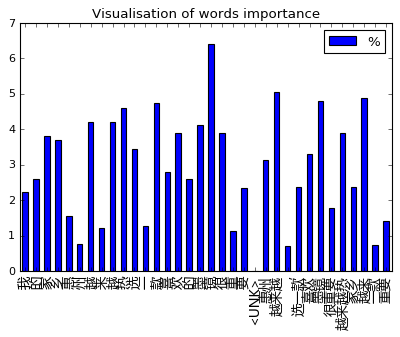

In [34]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')